# Projet Data mining : Opmisation du Panier d'Achat du Consommateur 

                            
- *Objectif* : Développer un system pour  recommander des articles complémentaires à ajouter au panier d'achat des consommateurs basé sur les règles d'association identifiées à partir des données de transaction. La base de données est fourni en annexe. 

                            
 

### Étapes: 
#### 1. Prétraitement des Données : 
- Importer et nettoyer les données de transaction fournies. 

In [26]:
# importation des librairies necessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


from mlxtend.preprocessing import TransactionEncoder


In [27]:
# Importing and Preparing the Dataset
data = pd.read_csv("Market_Basket_Optimisation.csv",header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
data.shape

(7501, 20)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [30]:
# let's describe the dataset

data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


#### Obtenir la liste des transactions
Une fois que nous avons lu l’ensemble de données, nous devons obtenir la liste des éléments de chaque transaction. Nous allons donc exécuter deux boucles ici. L’une pour le nombre total de transactions et l’autre pour le nombre total de colonnes dans chaque transaction.

In [31]:
# Getting the list of transactions from the dataset
transactions = []
for i in range(0, len(data)):
    transactions.append([str(data.values[i,j]) for j in range(0, len(data.columns))])
transactions[0]

['shrimp',
 'almonds',
 'avocado',
 'vegetables mix',
 'green grapes',
 'whole weat flour',
 'yams',
 'cottage cheese',
 'energy drink',
 'tomato juice',
 'low fat yogurt',
 'green tea',
 'honey',
 'salad',
 'mineral water',
 'salmon',
 'antioxydant juice',
 'frozen smoothie',
 'spinach',
 'olive oil']

#### Encodage des données de transaction

Grâce à Transactionencoder, nous pouvons transformer cet ensemble de données en un cadre de données logique. Chaque colonne représente un article et chaque ligne un enregistrement ou une transaction pour un achat.

VRAI si la transaction a lieu, FAUX sinon

In [32]:


# Import the transaction encoder function from mlxtend
from mlxtend.preprocessing import TransactionEncoder

# Instantiate transaction encoder and identify unique items
encoder = TransactionEncoder().fit(transactions)

# One-hot encode transactions
onehot = encoder.transform(transactions)

# Convert one-hot encoded data to DataFrame
df_onehot = pd.DataFrame(onehot, columns = encoder.columns_).drop('nan', axis=1)

# Print the one-hot encoded transaction dataset
df_onehot.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [33]:
#check column names 
for col in df_onehot.columns:
    print(col)

 asparagus
almonds
antioxydant juice
asparagus
avocado
babies food
bacon
barbecue sauce
black tea
blueberries
body spray
bramble
brownies
bug spray
burger sauce
burgers
butter
cake
candy bars
carrots
cauliflower
cereals
champagne
chicken
chili
chocolate
chocolate bread
chutney
cider
clothes accessories
cookies
cooking oil
corn
cottage cheese
cream
dessert wine
eggplant
eggs
energy bar
energy drink
escalope
extra dark chocolate
flax seed
french fries
french wine
fresh bread
fresh tuna
fromage blanc
frozen smoothie
frozen vegetables
gluten free bar
grated cheese
green beans
green grapes
green tea
ground beef
gums
ham
hand protein bar
herb & pepper
honey
hot dogs
ketchup
light cream
light mayo
low fat yogurt
magazines
mashed potato
mayonnaise
meatballs
melons
milk
mineral water
mint
mint green tea
muffins
mushroom cream sauce
napkins
nonfat milk
oatmeal
oil
olive oil
pancakes
parmesan cheese
pasta
pepper
pet food
pickles
protein bar
red wine
rice
salad
salmon
salt
sandwich
shallot
shampoo

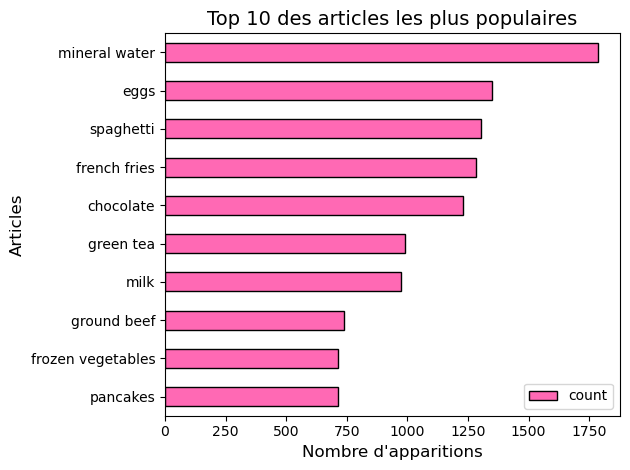

In [34]:

# Calcul de la fréquence de chaque article
count = df_onehot.loc[:, :].sum()
pop_item = count.sort_values(ascending=False).head(10)
pop_item = pop_item.to_frame()
pop_item = pop_item.reset_index()
pop_item = pop_item.rename(columns={"index": "items", 0: "count"})

# Configuration de la figure
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('default')  # Fond clair (style par défaut)

# Création du graphique
ax = pop_item.plot.barh(
    x='items',
    y='count',
    color='#FF69B4',        # Une seule couleur (rose vif)
    edgecolor='black'       # Bordures visibles
)

# Personnalisation du titre et des axes
plt.title('Top 10 des articles les plus populaires', fontsize=14, color='black')
plt.xlabel('Nombre d\'apparitions', fontsize=12)
plt.ylabel('Articles', fontsize=12)

# Inverser l'ordre pour avoir le plus populaire en haut
plt.gca().invert_yaxis()

# Affichage du graphique
plt.tight_layout()
plt.show()


#### 2. Analyse des Règles d'Association : 
 - Utilisation l'algorithme Apriori pour extraire les règles d'association à partir des données.

*L'Algorithme Apriori utilise des ensembles d'éléments fréquents pour générer des règles d'association. Ce principe repose sur le principe qu'un sous-ensemble d'un ensemble d'éléments fréquents doit être un ensemble d'éléments fréquents. (Un ensemble d'éléments fréquents est un ensemble d'éléments dont la valeur de support est supérieure à un seuil spécifié.)*

In [35]:
#Import apriori from mlxtend
from mlxtend.frequent_patterns import apriori

# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(df_onehot, 
                            min_support = 0.03, 
                            use_colnames = True)

# Print a preview of the frequent itemsets
frequent_itemsets


,support,itemsets
0,0.033329,(avocado)
1,0.033729,(brownies)
2,0.087188,(burgers)
3,0.030129,(butter)
4,0.081056,(cake)
5,0.046794,(champagne)
6,0.059992,(chicken)
7,0.163845,(chocolate)
8,0.080389,(cookies)
9,0.051060,(cooking oil)


In [36]:


# Import the association rules function
from mlxtend.frequent_patterns import association_rules

# Compute all association rules for frequent_itemsets
rules = association_rules(frequent_itemsets, 
                            metric = "lift", 
                            min_threshold = 0.4)

# Print association rules
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         36 non-null     object 
 1   consequents         36 non-null     object 
 2   antecedent support  36 non-null     float64
 3   consequent support  36 non-null     float64
 4   support             36 non-null     float64
 5   confidence          36 non-null     float64
 6   lift                36 non-null     float64
 7   representativity    36 non-null     float64
 8   leverage            36 non-null     float64
 9   conviction          36 non-null     float64
 10  zhangs_metric       36 non-null     float64
 11  jaccard             36 non-null     float64
 12  certainty           36 non-null     float64
 13  kulczynski          36 non-null     float64
dtypes: float64(12), object(2)
memory usage: 4.1+ KB


In [37]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(eggs),(chocolate),0.179709,0.163845,0.033196,0.184718,1.127397,1.0,0.003751,1.025603,0.137757,0.106959,0.024963,0.193661
1,(chocolate),(eggs),0.163845,0.179709,0.033196,0.202604,1.127397,1.0,0.003751,1.028711,0.135143,0.106959,0.027910,0.193661
2,(french fries),(chocolate),0.170911,0.163845,0.034395,0.201248,1.228284,1.0,0.006393,1.046827,0.224169,0.114514,0.044732,0.205587
3,(chocolate),(french fries),0.163845,0.170911,0.034395,0.209927,1.228284,1.0,0.006393,1.049383,0.222275,0.114514,0.047059,0.205587
4,(chocolate),(milk),0.163845,0.129583,0.032129,0.196094,1.513276,1.0,0.010898,1.082736,0.405645,0.122959,0.076414,0.222018
5,(milk),(chocolate),0.129583,0.163845,0.032129,0.247942,1.513276,1.0,0.010898,1.111823,0.389677,0.122959,0.100577,0.222018
6,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,1.0,0.013604,1.122357,0.308965,0.150648,0.109018,0.271158
7,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,1.0,0.013604,1.073256,0.339197,0.150648,0.068256,0.271158
8,(chocolate),(spaghetti),0.163845,0.174110,0.039195,0.239219,1.373952,1.0,0.010668,1.085581,0.325505,0.131191,0.078835,0.232167
9,(spaghetti),(chocolate),0.174110,0.163845,0.039195,0.225115,1.373952,1.0,0.010668,1.079070,0.329550,0.131191,0.073276,0.232167


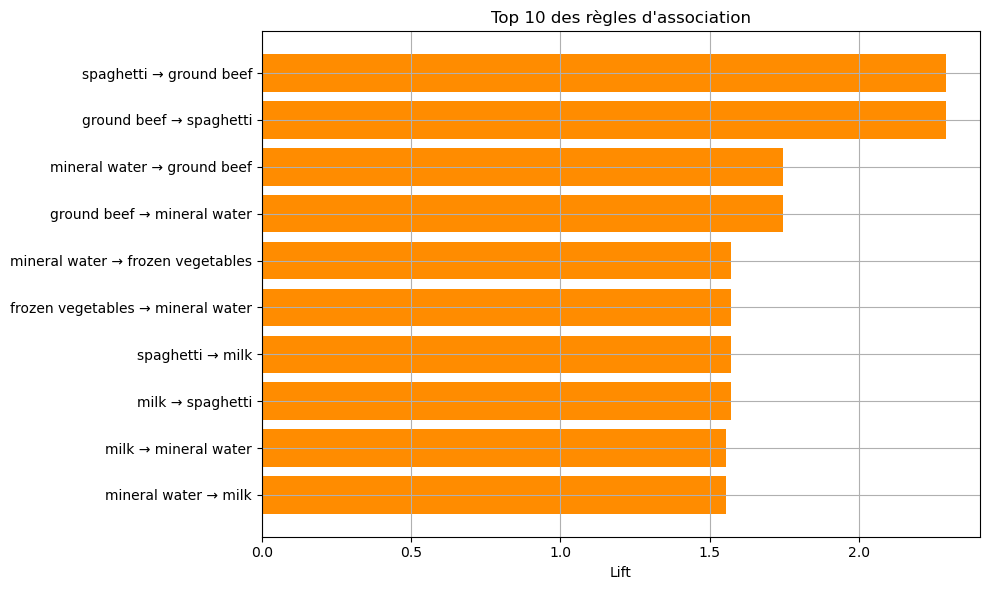

In [38]:
# Trier les règles par lift et prendre les 10 meilleures
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

# Créer des noms lisibles pour chaque règle
top_rules['Règle'] = top_rules['antecedents'].apply(lambda x: ', '.join(list(x))) + ' → ' + top_rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Créer un graphique en barres
plt.figure(figsize=(10, 6))
plt.barh(top_rules['Règle'], top_rules['lift'], color='darkorange')
plt.xlabel('Lift')
plt.title('Top 10 des règles d\'association')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


##### 3. Recommandations de Panier : 
- Utiliser les règles d'association identifiées pour recommander des articles complémentaires. 
- Générer des recommandations personnalisées en fonction des articles déjà présents dans le panier du consommateur.

In [39]:
def recommend_products(rules, user_basket, top_n=5):
    """
    Fonction de recommandation à partir des règles d'association

    :param rules: dataframe contenant les règles d'association (avec antécédents, conséquents, confiance, lift, etc.)
    :param user_basket: ensemble (set) des produits présents dans le panier de l'utilisateur
    :param top_n: nombre maximum de recommandations à retourner
    :return: liste des produits recommandés
    """

    # Initialiser une liste pour stocker les recommandations brutes
    recommendations = []

    # Parcourir chaque règle d'association
    for _, row in rules.iterrows():
        # Si les produits du panier de l'utilisateur correspondent aux antécédents d'une règle
        # et que les produits suggérés (conséquents) ne sont pas déjà dans le panier
        if row['antecedents'].issubset(user_basket) and not row['consequents'].issubset(user_basket):
            # Ajouter la règle comme (produits recommandés, confiance, lift)
            recommendations.append((row['consequents'], row['confidence'], row['lift']))

    # Trier les recommandations selon : d'abord la confiance, puis le lift (les plus pertinents en premier)
    recommendations = sorted(recommendations, key=lambda x: (x[1], x[2]), reverse=True)

    # Initialiser une liste pour les recommandations finales uniques
    final_reco = []
    seen = set()  # pour éviter les doublons

    # Parcourir les recommandations triées
    for items, _, _ in recommendations:
        for item in items:
            # Ajouter un produit uniquement s'il n'est pas encore recommandé
            if item not in seen:
                final_reco.append(item)
                seen.add(item)
            # Limiter le nombre total de recommandations à top_n
            if len(final_reco) >= top_n:
                break
        if len(final_reco) >= top_n:
            break

    # Retourner la liste finale des produits recommandés
    return final_reco


In [43]:
# Entrée manuelle du panier
panier_saisi = input("Entrez les articles de votre panier (séparés par des virgules) :\nExemple : milk, eggs, bread\n> ")

# Nettoyage
user_basket = set(item.strip().lower() for item in panier_saisi.split(','))

# Appel de la fonction
recommandations = recommend_products(rules, user_basket, top_n=5)

# Affichage des résultats
if recommandations:
    print("\n Produits recommandés :")
    for produit in recommandations:
        print("•", produit)
else:
    print("\n Aucune recommandation trouvée pour ce panier.")


Entrez les articles de votre panier (séparés par des virgules) :
Exemple : milk, eggs, bread
> milk,eggs,bread

 Produits recommandés :
• mineral water
• spaghetti
• chocolate
• french fries


DEPLOIEMENT EN APPLICATION

In [41]:
import pickle

# Aller dans le dossier parent, puis dans flask_app
with open('C:/Users/pc/Desktop/UVS M1_M2/Semestre 3/DataMining/Projet/ProjetCode/Flask_app/rules.pkl', 'wb') as f:
    pickle.dump(rules, f)
